In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
plt.rcParams['figure.figsize']=(20,5) 

In [13]:
df=pd.read_csv('Advertising.csv')

In [14]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: xlabel='Newspaper', ylabel='Sales'>

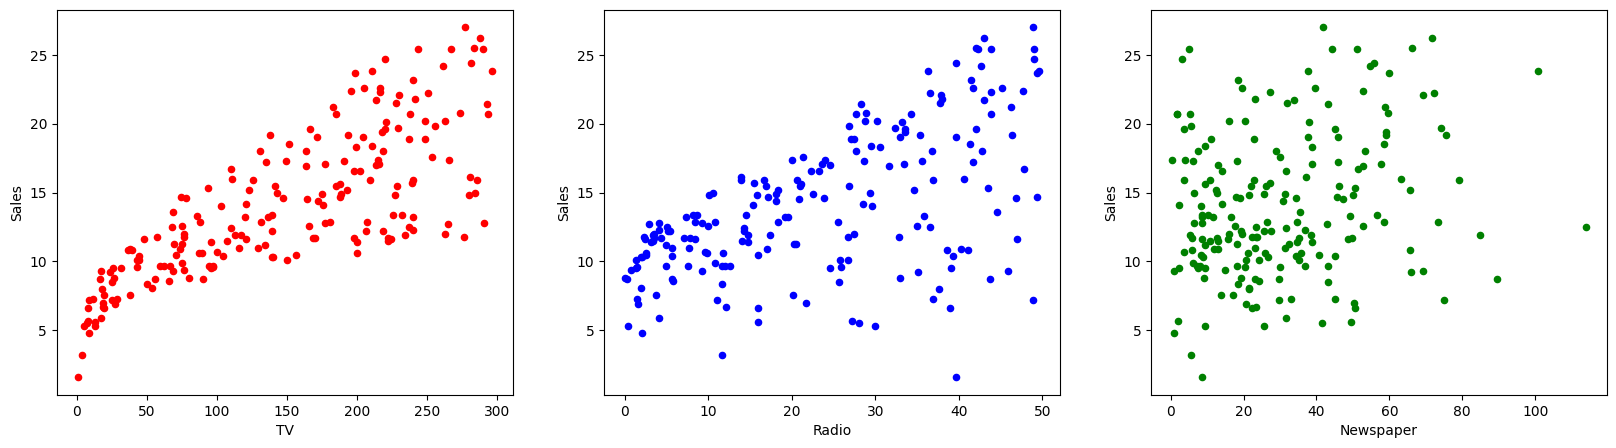

In [74]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)
df.plot.scatter(x='TV',y='Sales', ax=ax1, color='red')
df.plot.scatter(x='Radio', y='Sales', ax=ax2, color='blue')
df.plot.scatter(x='Newspaper', y='Sales', ax=ax3, color='green')

In [55]:
from sklearn.linear_model import LinearRegression


In [56]:
model=LinearRegression(fit_intercept=True)

In [57]:
x=df[['TV']]
y=df['Sales']
x.head(3)

,TV
0,230.1
1,44.5
2,17.2


In [58]:
model.fit(x,y)

LinearRegression()

In [59]:
model.coef_

array([0.04753664])

In [60]:
model.intercept_

7.032593549127693

In [53]:
ventas_estimadas=model.intercept_+4*model.coef_
print(ventas_estimadas)

[7.22274011]


In [61]:
model.predict([[4]])

/home/david/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.22274011])

In [63]:
#terrenos 
generate_superficie=np.random.normal(loc=100, scale=20, size=1000).astype(int)
print(generate_superficie[0:30])

[ 94  87 108 100 104  76 119  87  93  64  71  97  93 102 111 101 112 130
  77  94  70 130  80  96  84  82  76  58  93 107]


In [64]:
error=np.random.normal(loc=0, scale=80000, size=1000).astype(int)
print(error[0:30])

[ -9915   5003   -862   2414   5957   8615  -7733  -7866  16198    999
 -11604      1   1012   1379  -5936  13868 -16230 -22314  13583   3095
   8372   -999  11390   1816   5999   2748    666   5859  17447 -10974]


In [67]:
precio_total=(generate_superficie*2000+10000+error).astype(int)
print(precio_total[0:30])

[188085 189003 225138 212414 223957 170615 240267 176134 212198 138999
 140396 204001 197012 215379 226064 225868 217770 247686 177583 201095
 158372 269001 181390 203816 183999 176748 162666 131859 213447 213026]


In [77]:
#COnfianza de predicciones 
df_poblacion=pd.DataFrame({'superficies':generate_superficie, 'precio':precio_total})
df_muestra=df_poblacion.sample(30)

In [80]:
model.fit(df_muestra[['superficies']], df_muestra['precio'])


LinearRegression()

In [83]:
coeficient_model=model.coef_
print(coeficient_model)

[1966.05009475]


In [84]:
f'segun el modelo de prediccion, la aproximacion de de confianza a los datos es: {coeficient_model}'

'segun el modelo de prediccion, la aproximacion de de confianza a los datos es: [1966.05009475]'

In [90]:
#tomando otra muestra 
df_muestra=df_poblacion.sample(50)
model.fit(df_muestra[['superficies']], df_muestra['precio'])
print(model.coef_)


[2017.00239068]


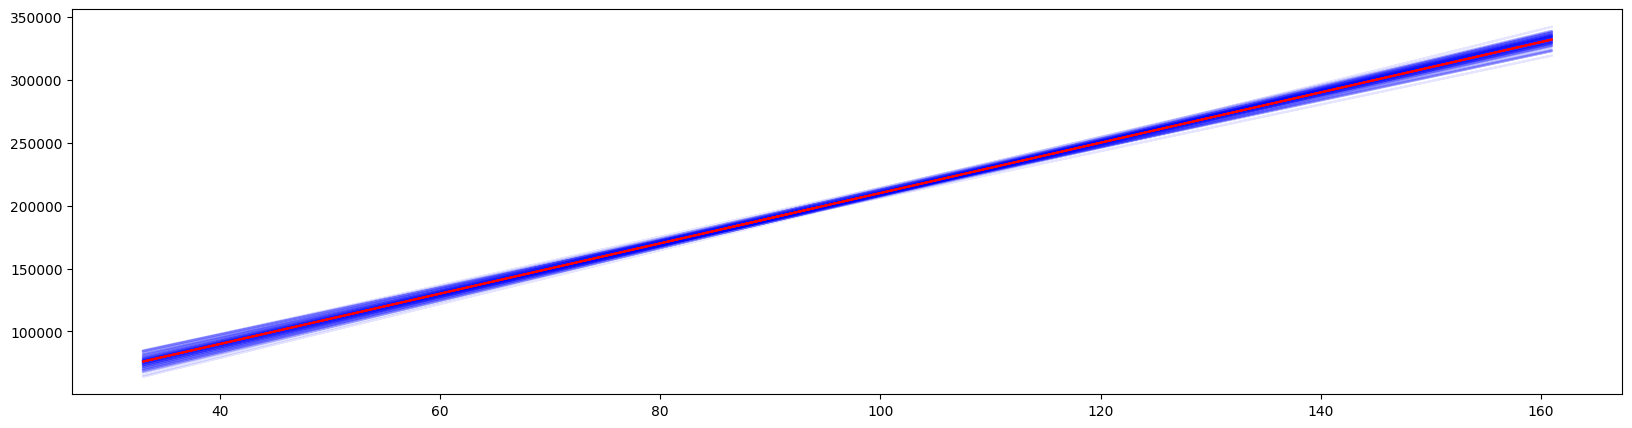

In [93]:
for i in range(100):
    df_muestra=df_poblacion.sample(30)
    model.fit(df_muestra[['superficies']], df_muestra['precio'])
    prediccion=model.predict(df_poblacion[['superficies']])
    
    plt.plot(df_poblacion['superficies'], prediccion, color='blue', alpha=0.1)
    
generate_procces=10000+df_poblacion['superficies']*2000
plt.plot(df_poblacion['superficies'], generate_procces, color='red')
plt.show()

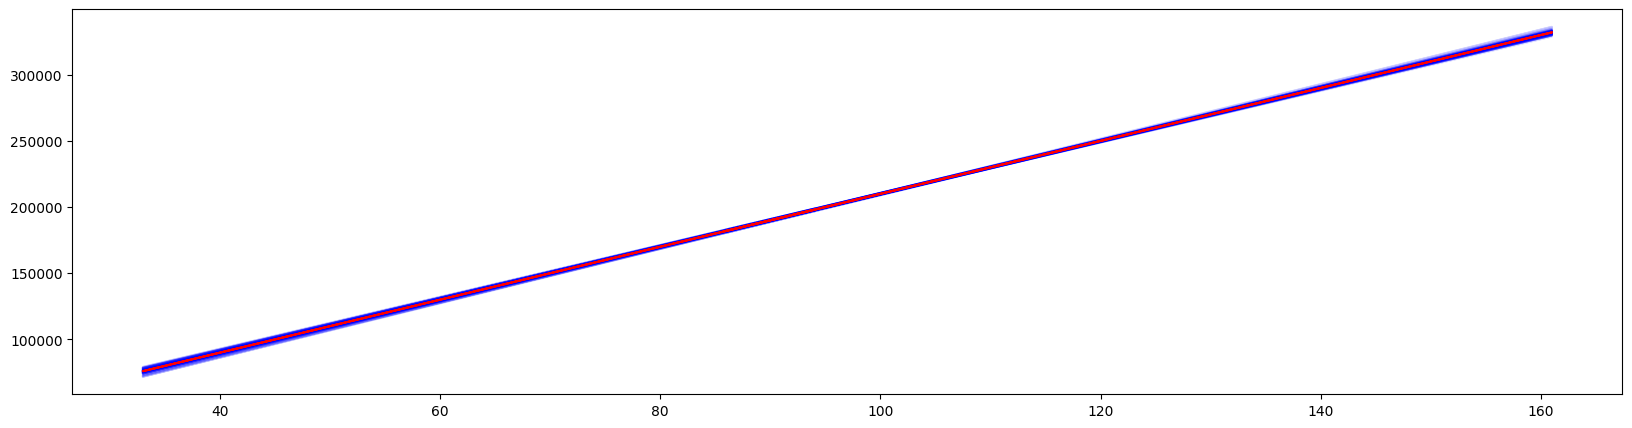

In [98]:
for i in range(100):
    df_muestra=df_poblacion.sample(250)
    model.fit(df_muestra[['superficies']], df_muestra['precio'])
    prediccion=model.predict(df_poblacion[['superficies']])
    
    plt.plot(df_poblacion['superficies'], prediccion, color='blue', alpha=0.1)
    
generate_procces=10000+df_poblacion['superficies']*2000
plt.plot(df_poblacion['superficies'], generate_procces, color='red')

plt.show()